# ANALIZA EURO JACKPOT

In [1]:
import pandas as pd

podatki_stevilke = pd.read_csv('stevilke.csv')
podatki_stevilke_euro = pd.read_csv('stevilke_euro.csv')
podatki_euro = pd.read_csv('euro.csv')
podatki_po_drzavah = pd.read_csv('po_drzavah_euro.csv')
podatki_total = pd.read_csv('total_euro.csv')

pd.options.display.max_rows = 20

%matplotlib inline

## Najprej začnimo s tem, kar nas najbolj zanima

In [2]:
stevilke = podatki_stevilke.groupby('stevilke').count().sort_values('datum', ascending = False).head(10)
stevilke

,datum
stevilke,
18,47
16,46
46,45
19,45
33,44
49,44
20,44
40,44
35,43


In [3]:
stevilke_euro = podatki_stevilke_euro.groupby('stevilke').count().sort_values('datum', ascending = False)
stevilke_euro

,datum
stevilke,
8,93
5,92
3,88
7,82
4,80
6,80
1,74
2,70
9,58


## Nadaljujemo z osnovnimi podatki o številu zmagovalcev in vseh dobitkov

Tukaj nas zanima, kdaj je zmagalo največ oseb.
Podatki so razporejeni po: 
* **_winners:_** število zmagovalcev
* **_total:_** število vseh dobitkov
* **_amount:_** sklad v evrih

In [4]:
zrebanje_v_letu = podatki_euro["id"]
podatki_euro["zrebanje v letu"] = zrebanje_v_letu
boljsi_podatki_euro = podatki_euro.drop(columns = "id")
boljsi_podatki_euro.sort_values(["winners", "total", "amount"], ascending=False)

,datum,winners,total,amount,zrebanje v letu
132,06.01.2017,5,1773439,90000000,1
42,16.11.2018,5,1566565,90000000,46
21,10.05.2019,2,1880503,90000000,19
58,06.07.2018,2,1807268,90000000,27
53,31.08.2018,2,1235343,61841617,35
...,...,...,...,...,...
352,21.09.2012,0,258660,14000000,27
369,25.05.2012,0,257304,11000000,10
372,04.05.2012,0,256137,18000000,7
365,22.06.2012,0,249482,15000000,14


In [5]:
najvec_zmagovalcev = boljsi_podatki_euro.sort_values(["total", "amount"], ascending=False)
najvec_zmagovalcev

,datum,winners,total,amount,zrebanje v letu
76,09.02.2018,1,2101947,90000000,6
21,10.05.2019,2,1880503,90000000,19
58,06.07.2018,2,1807268,90000000,27
77,02.02.2018,0,1800492,90000000,5
132,06.01.2017,5,1773439,90000000,1
...,...,...,...,...,...
352,21.09.2012,0,258660,14000000,27
369,25.05.2012,0,257304,11000000,10
372,04.05.2012,0,256137,18000000,7
365,22.06.2012,0,249482,15000000,14


Število zmagovalcev po letu

In [6]:
pd.options.mode.chained_assignment = None
datum_sklad = boljsi_podatki_euro[['datum', "amount", "total", "winners"]]
datum_sklad['datum_prav'] = pd.to_datetime(datum_sklad['datum'], dayfirst=True)
po_letu = pd.DatetimeIndex(datum_sklad['datum_prav']).year
po_mesecu = pd.DatetimeIndex(datum_sklad['datum_prav']).month
leto = pd.DataFrame(po_letu)
mesec = pd.DataFrame(po_mesecu)
datum_sklad['mesec'] = mesec
datum_sklad['leto'] = leto
datum_sklad_dobitek = datum_sklad.drop(columns= 'datum_prav')
leto_winner = datum_sklad_dobitek[['winners', 'leto', 'total']]
najboljse_leto = leto_winner.groupby('leto')
najboljse_leto.sum().sort_values(['winners', 'total'], ascending=False)

,winners,total
leto,,
2017,17,34421280
2018,14,47286795
2016,9,34408240
2014,8,26229514
2019,7,32540031
2015,7,30229133
2013,7,21301003
2012,3,12767494


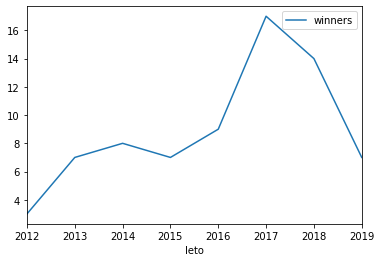

In [51]:

new_najboljse_leto= leto_winner.groupby('leto').sum().reset_index()
new_najboljse_leto.plot(x = 'leto', y = 'winners')

Prvi graf prikazuje, kako se je sklad spreminjal skozi čas.<br/>(**opomba:** Ko nekdo zadane glavni dobitek, se sklad vrne na začetno vrednost).<br/>Drugi graf prikazuje število vseh dobitkov skozi čas.

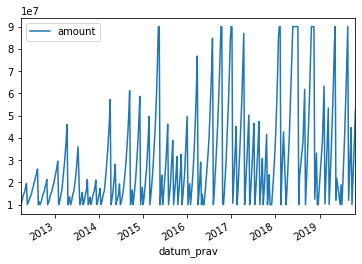

In [7]:
datum_sklad.plot(x ='datum_prav', y='amount')

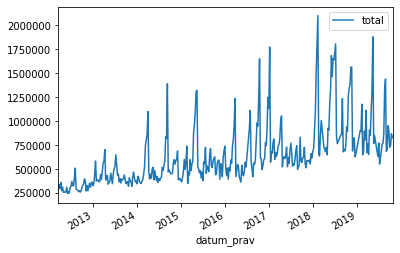

In [8]:
datum_sklad
datum_sklad.plot(x ='datum_prav', y='total')

In [9]:
datum_sklad["Match 5 and 2 Euro Numbers"] = podatki_total["Match 5 and 2 Euro Numbers"]
datum_sklad["Match 5 and 1 Euro Number"] = podatki_total["Match 5 and 1 Euro Number"]
datum_sklad["Match 5"] = podatki_total["Match 5"]
datum_sklad["Match 4 and 2 Euro Numbers"] = podatki_total["Match 4 and 2 Euro Numbers"]
datum_sklad["Match 4 and 1 Euro Number"] = podatki_total["Match 4 and 1 Euro Number"]
datum_sklad["Match 4"] = podatki_total["Match 4"]
datum_sklad["Match 3 and 2 Euro Numbers"] = podatki_total["Match 3 and 2 Euro Numbers"]
datum_sklad["Match 2 and 2 Euro Numbers"] = podatki_total["Match 2 and 2 Euro Numbers"]
datum_sklad["Match 3 and 1 Euro Number"] = podatki_total["Match 3 and 1 Euro Number"]
datum_sklad["Match 3"] = podatki_total["Match 3"]
datum_sklad["Match 1 and 2 Euro Numbers"] = podatki_total["Match 1 and 2 Euro Numbers"]
datum_sklad["Match 2 and 1 Euro Number"] = podatki_total["Match 2 and 1 Euro Number"]
datum_sklad
dobitki = ["Match 5 and 2 Euro Numbers", "Match 5 and 1 Euro Number", "Match 5", "Match 4 and 2 Euro Numbers", "Match 4 and 1 Euro Number",
          "Match 4", "Match 3 and 2 Euro Numbers", "Match 2 and 2 Euro Numbers", "Match 3 and 1 Euro Number", "Match 3", "Match 1 and 2 Euro Numbers", "Match 2 and 1 Euro Number"
          ]
datum_sklad

,datum,amount,total,winners,datum_prav,mesec,leto,Match 5 and 2 Euro Numbers,Match 5 and 1 Euro Number,Match 5,Match 4 and 2 Euro Numbers,Match 4 and 1 Euro Number,Match 4,Match 3 and 2 Euro Numbers,Match 2 and 2 Euro Numbers,Match 3 and 1 Euro Number,Match 3,Match 1 and 2 Euro Numbers,Match 2 and 1 Euro Number
0,25.10.2019,52634037,825127,0,2019-10-25,10,2019,0,6,5,40,670,1273,1907,29108,33493,59911,164813,533901
1,18.10.2019,40480297,830721,0,2019-10-18,10,2019,0,4,5,55,739,1359,2633,35746,34702,62326,164568,528584
2,11.10.2019,29507060,867714,0,2019-10-11,10,2019,0,2,5,71,823,1482,2383,35152,37090,66502,177122,547082
3,04.10.2019,19371406,743837,0,2019-10-04,10,2019,0,4,0,42,634,984,1720,26246,30981,48247,141637,493342
4,27.09.2019,10000000,727336,0,2019-09-27,9,2019,0,1,2,43,641,1097,2218,31649,30751,52050,165478,443406
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374,20.04.2012,15000000,272768,0,2012-04-20,4,2012,0,1,1,23,221,272,935,10163,14154,12395,79453,155150
375,13.04.2012,14000000,361009,0,2012-04-13,4,2012,0,0,0,28,387,497,1169,17373,15794,21700,73909,230152
376,06.04.2012,12000000,298684,0,2012-04-06,4,2012,0,1,1,12,185,248,852,10782,14301,13437,77156,181709
377,30.03.2012,11000000,338274,0,2012-03-30,3,2012,0,5,3,46,667,903,1514,19123,16957,26050,74366,198640


In [10]:
procenti = datum_sklad.copy()
for i in dobitki:
  procenti[i + ' v %'] = (procenti[i])/(procenti['total']) * 100
procenti

In [19]:
velik = procenti[[dobitki[10], dobitki[10] + ' v %' ]]
velik.sort_values(dobitki[10] + ' v %', ascending = False)


,Match 1 and 2 Euro Numbers,Match 1 and 2 Euro Numbers v %
368,108691,34.900732
287,127014,33.937279
283,122560,33.650454
350,103880,33.299034
358,168765,33.126186
...,...,...
160,73760,15.561083
174,113663,15.368879
227,53090,15.249262
105,78965,14.896162
